In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
import warnings
warnings.filterwarnings("ignore")

In [169]:
df=pd.read_csv(r"E:\AKASH\Data Analytics\Machine Learning\project\Employee.csv")
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
4652,Bachelors,2015,Bangalore,3,33,Male,Yes,4,0
4653,Bachelors,2015,NaN,3,33,Male,Yes,4,0


In [170]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [171]:
df.tail()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
4652,Bachelors,2015,Bangalore,3,33,Male,Yes,4,0
4653,Bachelors,2015,NaN,3,33,Male,Yes,4,0
4654,Bachelors,2015,NaN,3,33,Male,Yes,4,0


In [172]:
df.shape

(4655, 9)

In [173]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4655 entries, 0 to 4654
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4655 non-null   object
 1   JoiningYear                4655 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4655 non-null   int64 
 4   Age                        4655 non-null   int64 
 5   Gender                     4655 non-null   object
 6   EverBenched                4655 non-null   object
 7   ExperienceInCurrentDomain  4655 non-null   int64 
 8   LeaveOrNot                 4655 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.4+ KB


In [175]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4655.000000,4655.000000,4655.000000,4655.000000,4655.000000
mean,2015.062943,2.698389,29.394844,2.906122,0.343716
std,1.862977,0.561350,4.825629,1.558071,0.474999
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [176]:
df.duplicated().sum()

1890

In [177]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         2
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [178]:
df=df.dropna()

In [179]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [180]:
df=df.drop_duplicates()

In [181]:
df.duplicated().sum()

0

In [182]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,0
4647,Bachelors,2016,Pune,3,30,Male,No,2,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1


In [183]:
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
le4=LabelEncoder()

In [184]:
df["Education"]=le1.fit_transform(df["Education"])
df["City"]=le2.fit_transform(df["City"])
df["Gender"]=le3.fit_transform(df["Gender"])
df["EverBenched"]=le4.fit_transform(df["EverBenched"])
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4645,1,2017,2,2,31,0,0,2,0
4647,0,2016,2,3,30,1,0,2,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1


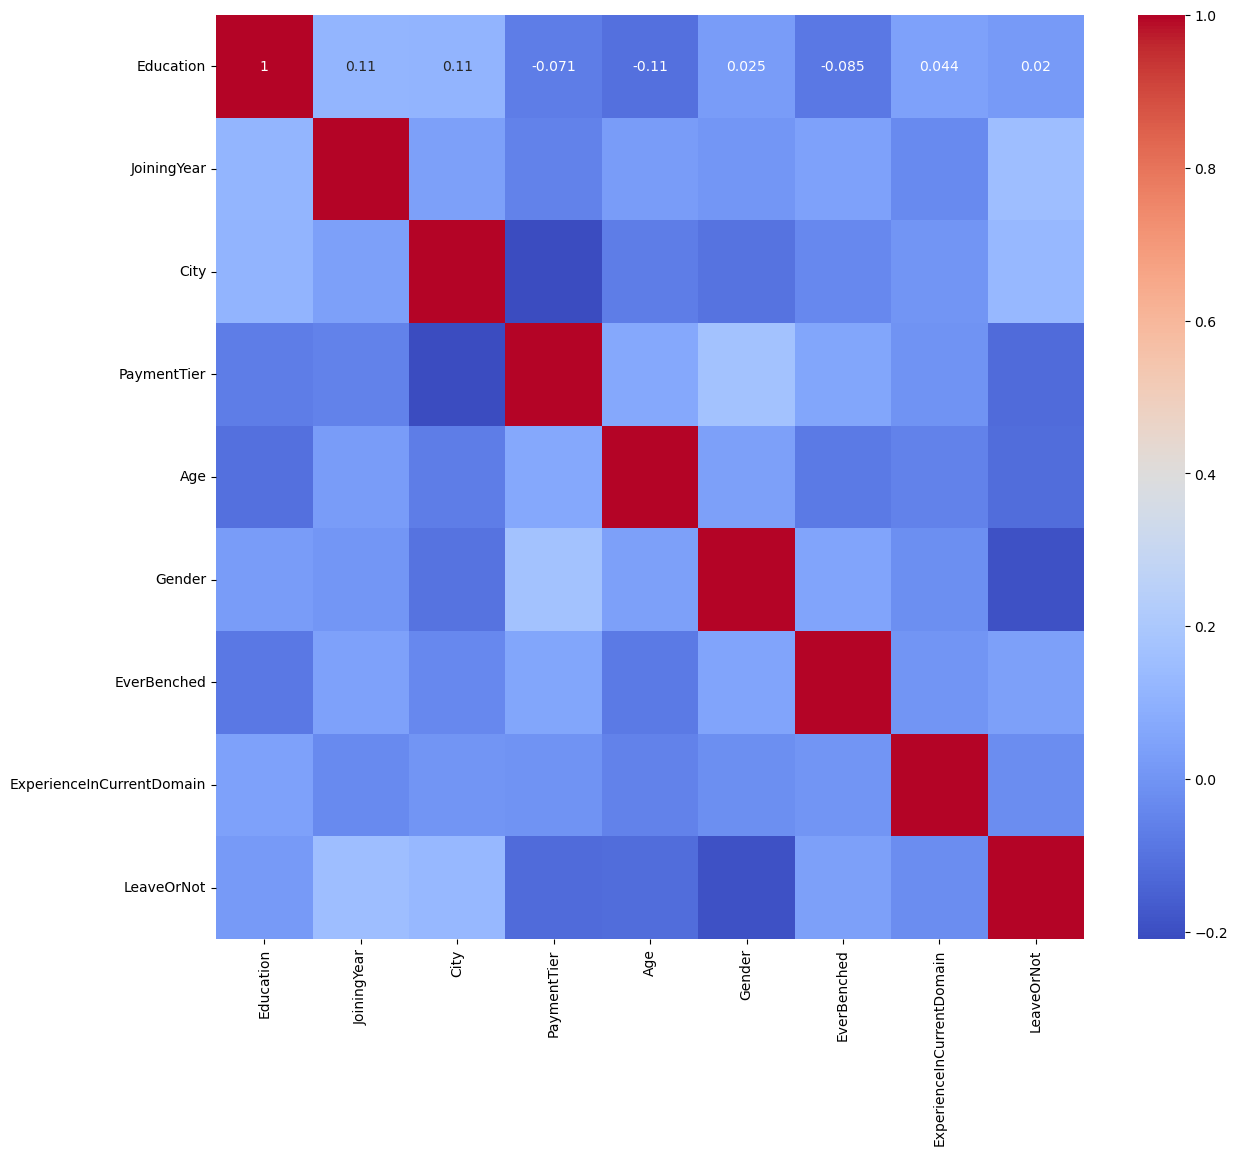

In [185]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

In [186]:
x=df.drop("LeaveOrNot",axis=1)
x

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0,2017,0,3,34,1,0,0
1,0,2013,2,1,28,0,0,3
2,0,2014,1,3,38,0,0,2
3,1,2016,0,3,27,1,0,5
4,1,2017,2,3,24,1,1,2
...,...,...,...,...,...,...,...,...
4645,1,2017,2,2,31,0,0,2
4647,0,2016,2,3,30,1,0,2
4649,1,2013,2,2,37,1,0,2
4650,1,2018,1,3,27,1,0,5


In [187]:
y=df.LeaveOrNot
y

0       0
1       1
2       0
3       1
4       1
       ..
4645    0
4647    0
4649    1
4650    1
4651    0
Name: LeaveOrNot, Length: 2764, dtype: int64

In [188]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [189]:
model=LogisticRegression()

In [190]:
model.fit(x_train,y_train)

LogisticRegression()

In [191]:
model.score(x_train,y_train)*100

66.3048394391678

In [192]:
model.score(x_test,y_test)*100

65.64195298372513

In [193]:
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [194]:
model1.score(x_train,y_train)*100

93.2157394843962

In [195]:
model1.score(x_test,y_test)*100

69.25858951175407

In [196]:
model2=RandomForestClassifier(n_estimators=100)
model2.fit(x_train,y_train)

RandomForestClassifier()

In [197]:
model2.score(x_train,y_train)*100

93.2157394843962

In [198]:
model2.score(x_test,y_test)*100

73.59855334538878

In [199]:
model3= KNeighborsClassifier(n_neighbors=5)
model3.fit(x_train,y_train)

KNeighborsClassifier()

In [200]:
model3.score(x_train,y_train)*100

81.54681139755766

In [201]:
model3.score(x_test,y_test)*100

73.05605786618446

In [202]:
model4=SVC()
model4.fit(x_train,y_train)

SVC()

In [203]:
model4.score(x_train,y_train)*100

81.36589778380822

In [204]:
model4.score(x_test,y_test)*100

81.19349005424955

In [206]:
education=input("Enter the qualification:")
education=le1.transform([education])
education

Enter the qualification: Masters


array([1])

In [207]:
year=int(input("Enter the joining year:"))
year

Enter the joining year: 2023


2023

In [208]:
city=input("Enter the city:")
city=le2.transform([city])
city

Enter the city: Bangalore


array([0])

In [209]:
payment=int(input("Enter the payment tier:"))
payment

Enter the payment tier: 2


2

In [210]:
age=int(input("Enter the age:"))
age

Enter the age: 35


35

In [211]:
gender=input("Enter the gender:")
gender=le3.transform([gender])
gender

Enter the gender: Male


array([1])

In [212]:
benched=input("Enter Yes/No if ever benched:")
benched=le4.transform([benched])
benched

Enter Yes/No if ever benched: No


array([0])

In [213]:
experience=int(input("Enter the experience in the current domain"))
experience

Enter the experience in the current domain 4


4

In [214]:
model4.predict([[education[0],year,city[0],payment,age,gender[0],benched[0],experience]])

array([1], dtype=int64)

In [220]:
df1=pd.DataFrame({"train_acc":[66,93,93,81,81],"test_acc":[65,69,73,73,81]},index=["Logistic Regression","DecisionTree Classifier","RandomForest Classifier","KNeighbours Classifier","SVM Classifier"])
df1

,train_acc,test_acc
Logistic Regression,66,65
DecisionTree Classifier,93,69
RandomForest Classifier,93,73
KNeighbours Classifier,81,73
SVM Classifier,81,81
